# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [5]:
imagen = imread(r"C:\Users\suert\OneDrive\Imágenes\Saved Pictures\terraza.jpg")


Analizala

Muestra la imagen para ver que se ha cargado bien

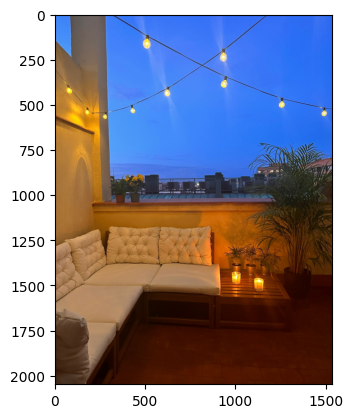

In [6]:
plt.imshow(imagen)
plt.show()

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [10]:

alto, ancho, color = imagen.shape
print(imagen.shape)

(2048, 1536, 3)


In [8]:
imagen_transformada = imagen.reshape(alto * ancho, color)

print(imagen_transformada.shape) 


(3145728, 3)


#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [13]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)


#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [15]:
labels = kmeans.fit_predict(imagen_transformada)

centroides =np.round( kmeans.cluster_centers_.astype('int'),2)




c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [18]:
imagen_salida =np.reshape(centroides[labels],(alto, ancho, color))

#### 7. Imprime y guarda en tu ordenador la imagen resultante

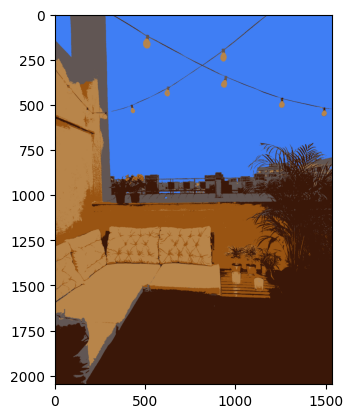

In [21]:
plt.imshow(imagen_salida)


#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [29]:
def funciones(imagen,num_colores= int):
    imagen =plt.imread(imagen) 
    alto, ancho, color = imagen.shape
    imagen_transformada = imagen.reshape(alto * ancho, color)
    kmeans = KMeans(n_clusters=num_colores, random_state=42)
    labels = kmeans.fit_predict(imagen_transformada)
    centroides = np.round(kmeans.cluster_centers_.astype('int'),2)
    imagen_salida = np.reshape(centroides[labels],(alto, ancho, color))
    respuesta = input("¿ver o guardar la imagen? (v/g)")
    if respuesta == "v":
        plt.imshow(imagen_salida)
        plt.show()
    else:
        plt.savefig('data/imagen_Carlos.png')

   

In [31]:
funciones('data/image.jpg',10)

c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 640x480 with 0 Axes>